In [1]:
#from numpy import fft, real, arange, pi, cos, hamming
#import matplotlib.pyplot as plt
%pylab inline

def powerSpect(data, sampleRate):
    '''Powerspectrum, calculated via Fourier Transfrom'''
    
    nData = len(data)
    fftData = fft.fft(data)
    
    Pxx = real(fftData * fftData.conj()) / nData
    freq = arange(nData)*sampleRate / nData
    
    return (Pxx, freq)
    
def showData(samplingRate, x, titleText):
    '''Show data in time domain, and corresponding powerspectrum'''
    
    t = arange(len(x)) / samplingRate
        
    fig, axs = plt.subplots(2,1)
    axs[0].plot(t,x)
    axs[0].set_xlabel('Time [s]')
    axs[0].set_ylabel('Signal')
    axs[0].set_title(titleText)
    
    # Calculate the powerspectrum
    (Pxx, freq) = powerSpect(x, samplingRate)
    
    axs[1].plot(freq, Pxx, 'o-')
    axs[1].set_xlim(1, 5000)
    axs[1].set_xlabel('Frequency [Hz]')
    axs[1].set_ylabel('Power')
    
    #plt.show()   # if run interactively, from ipython
    #plt.close()


Populating the interactive namespace from numpy and matplotlib


In [2]:
# Set the parameters
sampleRate = 100000
dt = 1./sampleRate
f = 1000
tMax = 0.01

# Calculate the data
t = arange(0, tMax, dt)
x = sin(2*pi*f*t)

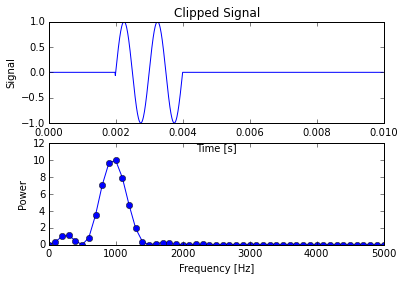

In [3]:
# Clip the data
y = x.copy()
y[1:199] = 0
y[400:1001] = 0
showData(sampleRate, y, 'Clipped Signal')